CS402 HOMEWORK 1
MELİH ÇAĞAN ARI 28426



In [2]:
#importing numPy library to use in functions
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# a function to generate numbers from a standard Normal distribution,
#  num_points random points in a num_dimensions dimensional space.
def random_points( num_points,  num_dimensions):
  random_points = np.random.randn(num_points, num_dimensions)
  return random_points

points = random_points(10,3)
points[1]


array([ 0.42054358, -0.51594784, -0.1473637 ])

In [4]:

# a helper function to calculate euclidean distance to find average distance
def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points in n-dimensional space.
    """
    point1 = np.array(point1)
    point2 = np.array(point2)
    return np.sqrt(np.sum((point1 - point2) ** 2))

# a function to calculate average distance of the selected_point to other points
def average_distance_sp(points, selected_point):
    """
    Calculate the average distance of the selected point to all other points.

    Parameters:
    - points: List of points (where each point is a list/tuple of coordinates).
    - selected_point: The point (list/tuple of coordinates) whose average distance to other points is to be calculated.

    Returns:
    - The average distance as a float.
    """
    total_distance = 0
    num_points = len(points)
    selected_point_np = np.array(selected_point)  # Ensure selected_point is a NumPy array for comparison

    for point in points:
        point_np = np.array(point)  # Convert each point to a NumPy array
        if not np.array_equal(point_np, selected_point_np):  # Use np.array_equal for comparison
            total_distance += euclidean_distance(point_np, selected_point_np)
    # Avoid division by zero
    if num_points > 1:
        # Subtract 1 from num_points to exclude the selected_point itself
        return total_distance / (num_points - 1)
    else:
        return 0

# Example usage
points = random_points(4,3)
selected_point = points[1]
average_distance = average_distance_sp(points, selected_point)
print("Average distance:", average_distance)


Average distance: 2.29066202351261


In [5]:
# a function to calculate minimum distance of the selected_point to other points
import sys

def minimum_distance_sp(points, selected_point):
    """
    Calculate the average distance of the selected point to all other points.

    Parameters:
    - points: List of points (where each point is a list/tuple of coordinates).
    - selected_point: The point (list/tuple of coordinates) whose average distance to other points is to be calculated.

    Returns:
    - The average distance as a float.
    """
    minimum_distance = 3000000
    distance = 0
    num_points = len(points)
    selected_point_np = np.array(selected_point)  # Ensure selected_point is a NumPy array for comparison

    for point in points:
        point_np = np.array(point)  # Convert each point to a NumPy array
        if not np.array_equal(point_np, selected_point_np):  # Use np.array_equal for comparison
            distance = euclidean_distance(point_np, selected_point_np)
            if distance < minimum_distance:
              minimum_distance = distance
            distance = 0
    # Avoid division by zero
    return minimum_distance

points = random_points(4,3)
selected_point = points[1]
minimum_distance = minimum_distance_sp(points, selected_point)
print("Minimum distance:", minimum_distance)


Minimum distance: 1.38899871089451


In [17]:
#a function to calculate the ratio of the closest distance to the average distance.

def closest_to_average_ratio(min_dist, avg_dist):
  return (min_dist/avg_dist)

#example
closest_to_average_ratio(2,3)



0.6666666666666666

In [18]:
#Experimentation and Visualization

#1)a
results = []
for d in range(1, 101): #  for all dimensions d = 1, 2 . . . 100
    ad_results = []
    for _ in range(100):
        # Generate 1000 d-dimensional data points
        points_SD = random_points(1000, d)
        # Select a random point
        selected_point_SD = points_SD[np.random.randint(1000)]
        # Calculate average distance, minimum distance, and closest-to-average ratio
        avg_distance_SD = average_distance_sp(points_SD, selected_point_SD)
        min_distance_SD = minimum_distance_sp(points_SD, selected_point_SD)
        closest_to_avg_ratio_SD = closest_to_average_ratio(min_distance_SD, avg_distance_SD)
        ad_results.append((avg_distance_SD, min_distance_SD, closest_to_avg_ratio_SD))
    results.append(ad_results)

# Calculate mean and standard deviation across all dimensions
mean_results = np.mean(results, axis=1)
std_results = np.std(results, axis=1)



In [19]:
# Print mean and standard deviation across Ad
print("MEAN RESULTS: " )
print(  mean_results)
print("STANDARD DEVIATION RESULTS: " )
print( std_results)



MEAN RESULTS: 
[[1.15572414e+00 2.58872205e-03 2.05604687e-03]
 [1.73559217e+00 7.11546875e-02 3.82553522e-02]
 [2.27806763e+00 2.48796130e-01 1.04582391e-01]
 [2.62325506e+00 4.79002077e-01 1.77464859e-01]
 [3.01617494e+00 6.91289721e-01 2.26106788e-01]
 [3.31864732e+00 9.47982985e-01 2.81766751e-01]
 [3.62887553e+00 1.18153774e+00 3.22473396e-01]
 [3.87749084e+00 1.38513885e+00 3.55283010e-01]
 [4.03358075e+00 1.54597912e+00 3.80685024e-01]
 [4.39744850e+00 1.85345743e+00 4.16558294e-01]
 [4.61852676e+00 2.01468511e+00 4.34216157e-01]
 [4.81091077e+00 2.29210537e+00 4.73443034e-01]
 [4.90763074e+00 2.33767698e+00 4.74771733e-01]
 [5.30035042e+00 2.67981109e+00 5.04050239e-01]
 [5.38248956e+00 2.76553297e+00 5.12208538e-01]
 [5.55843130e+00 2.87468169e+00 5.16068662e-01]
 [5.70274064e+00 3.07305330e+00 5.37279766e-01]
 [5.93007889e+00 3.28894883e+00 5.53380338e-01]
 [6.11511455e+00 3.41597579e+00 5.57444480e-01]
 [6.13597503e+00 3.55580341e+00 5.78577408e-01]
 [6.44685058e+00 3.790810

Length of mean_results: 100
Length of std_results: 100
Sample mean result: [1.15572414 0.00258872 0.00205605]
Sample std result: [0.384199   0.00338335 0.00225703]
mean_avg_distance: [1.1557241447446023, 1.735592166891371, 2.278067628370921, 2.6232550565165953, 3.0161749380722442, 3.318647319057374, 3.628875532914661, 3.8774908385820908, 4.033580749434771, 4.397448501118801, 4.61852676191121, 4.810910771235391, 4.9076307411493545, 5.300350421284286, 5.382489560587825, 5.558431300435151, 5.702740635891523, 5.930078890569933, 6.115114546735432, 6.135975033006134, 6.446850580726703, 6.556992267086913, 6.782269136383839, 6.873213722061605, 7.046196917297027, 7.178188433046904, 7.379485146553519, 7.462936417782285, 7.640071650555044, 7.61318400657497, 7.822813067383262, 7.936028714754542, 8.12030949775381, 8.1666587778169, 8.338373192319194, 8.438043051667812, 8.569118647063247, 8.683658391533447, 8.796325376749472, 8.932174400976841, 9.00810304381817, 9.118667964604967, 9.23742888913868, 9

<ErrorbarContainer object of 3 artists>

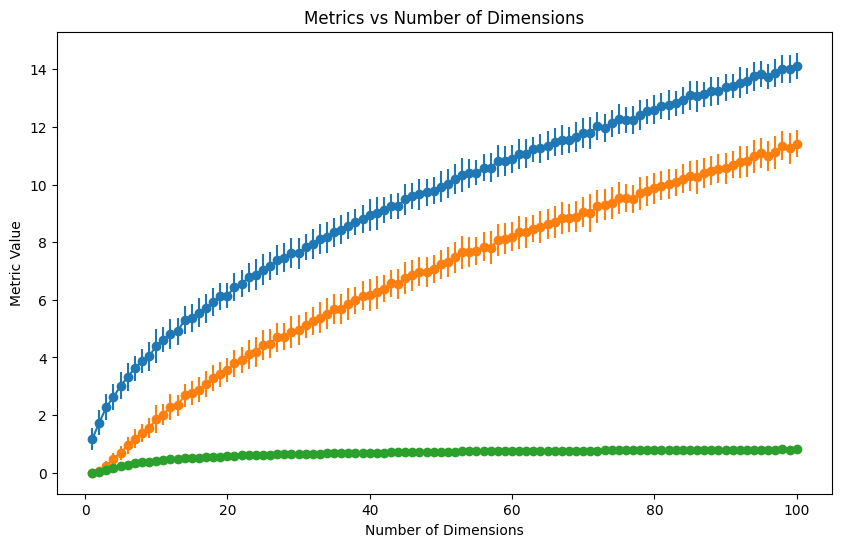

In [21]:
#1)b
import matplotlib.pyplot as plt
# Extracting means and standard deviations for each metric
print("Length of mean_results:", len(mean_results))
print("Length of std_results:", len(std_results))
print("Sample mean result:", mean_results[0])
print("Sample std result:", std_results[0])
mean_avg_distance = [result[0] for result in mean_results]
mean_min_distance = [result[1] for result in mean_results]
mean_closest_to_avg_ratio = [result[2] for result in mean_results]

print("mean_avg_distance:", mean_avg_distance)

std_avg_distance = [result[0] for result in std_results]
std_min_distance = [result[1] for result in std_results]
std_closest_to_avg_ratio = [result[2] for result in std_results]

# Plotting
dimensions = list(range(1, 101))  # Adjust the range to match your desired number of dimensions

plt.figure(figsize=(10, 6))
plt.xlabel('Number of Dimensions')
plt.ylabel('Metric Value')
plt.title('Metrics vs Number of Dimensions')
plt.errorbar(dimensions, mean_avg_distance, yerr=std_avg_distance, label='Mean Average Distance', fmt='-o')
plt.errorbar(dimensions, mean_min_distance, yerr=std_min_distance, label='Mean Minimum Distance', fmt='-o')
plt.errorbar(dimensions, mean_closest_to_avg_ratio, yerr=std_closest_to_avg_ratio, label='Mean Closest-to-Average Ratio', fmt='-o')

# mean_avg_distance, std_avg_distance(blue)
#mean_min_distance, std_min_distance(orange)
#mean_closest_to_avg_ratio, std_closest_to_avg_ratio(green)

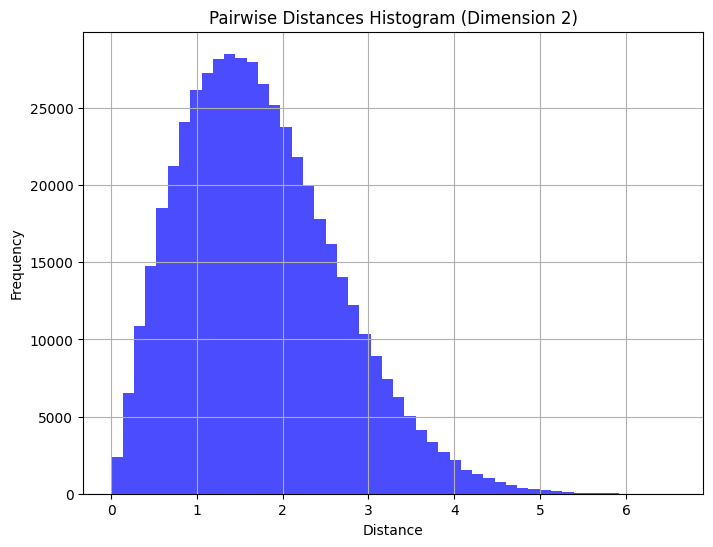

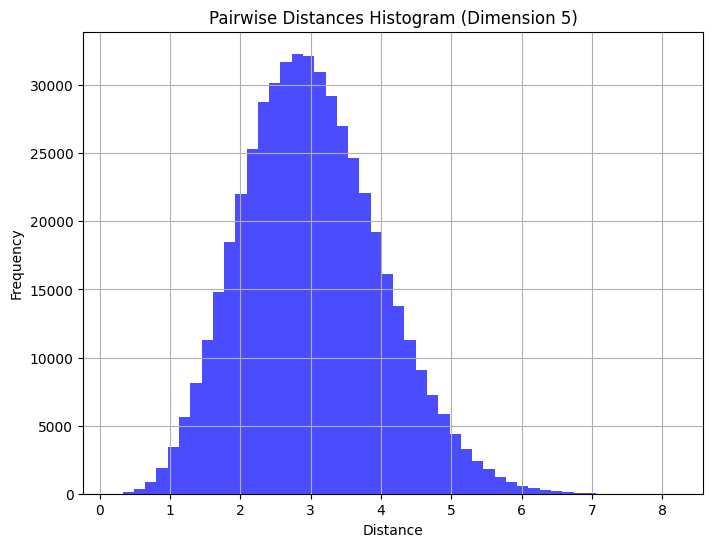

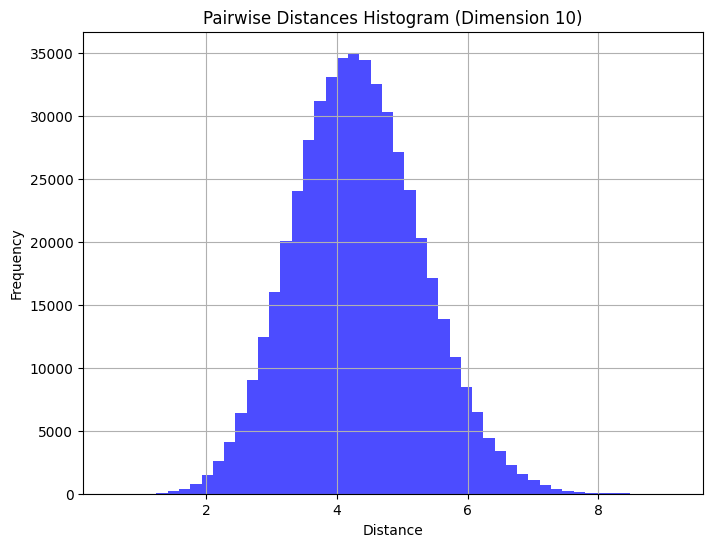

In [22]:
#1)c
# Function to calculate pairwise distances
def pairwise_distances(points):
    num_points = points.shape[0]
    distances = []
    for i in range(num_points):
        for j in range(i+1, num_points):
            distance = np.linalg.norm(points[i] - points[j])
            distances.append(distance)
    return np.array(distances)

# Generate data points and calculate pairwise distances for dimensions 2, 5, 10, and 100
dimensions_to_plot = [2, 5, 10, 100]
for d in dimensions_to_plot:
    points = random_points(1000, d)
    distances = pairwise_distances(points)

    # Plot histogram
    plt.figure(figsize=(8, 6))
    plt.hist(distances, bins=50, color='blue', alpha=0.7)
    plt.title(f"Pairwise Distances Histogram (Dimension {d})")
    plt.xlabel("Distance")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    """
    Şimdi sıkıntı şunlar, plterrorbar kullanabilir miyiz, sys kütüphanesini kullanabilr miyiz, 1 in son sorusunda 2, 5, 10, 100 dimensionlıları
    baştan oluştursak problem oluyo mu, eğer oluyosa önceden yaptığımız pointleri bi yere depolayıp ordan mı bulmamız lazım
    """

1)d)
All three metrics (mean_avg_distance, std_avg_distance, mean_closest_to_avg_ratio) appear to fluctuate slightly as the number of dimensions increases from 0 to 100.
Specific Observations:

mean_avg_distance (blue): This line shows a slight upward trend with some minor dips as the dimensionality increases. This suggests that the average distance between data points tends to increase as you move to higher dimensional spaces.

std_avg_distance (orange): This line is much more variable than the mean_avg_distance line. It's difficult to discern a clear trend, but there appears to be some increase in variance as the dimensionality increases. This suggests that the distribution of distances between data points becomes more spread out in higher dimensions.

mean_closest_to_avg_ratio (green): This line fluctuates around a value of 1 throughout the range. A value of 1 for the mean_closest_to_avg_ratio indicates that on average, the closest data point to the mean is also the average distance away. There is no clear trend with dimensionality.

When examining the standard deviation proportions, I observed that for dimensions approximately ranging between 30 and 70, the standard deviation intervals appear broader compared to other dimensions. Nevertheless, analyzing these standard deviation values remains challenging.

Furthermore, when pairwise distances in dimension 2, 5, 10 and 100, it can be clearly seen that average pairwise distance reducing and standard deviation slightly increase while dimension is increasing.

In [23]:
#Q2
#2.1
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# print the shapes
print('X_train shape:', X_train.shape, ', y_train shape:', y_train.shape)
print('X_test shape: ', X_test.shape, ', y_test shape: ', y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28) , y_train shape: (60000,)
X_test shape:  (10000, 28, 28) , y_test shape:  (10000,)


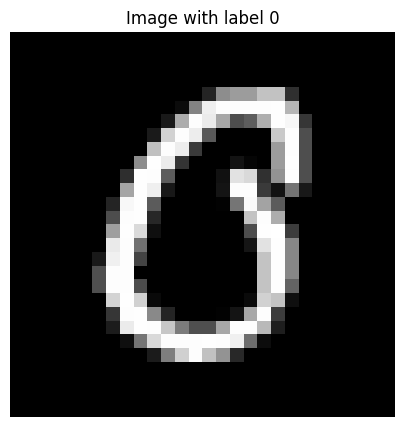

In [24]:
#visualizing some images in the dataset
idx = 234 # pick by index
image, label = X_train[idx], y_train[idx]

plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title('Image with label {}'.format(label))
plt.axis('off')
plt.show()

In [25]:
#Reshaping the dataset to convert input data into 2D array from 3D
print('X_train shape before: ', X_train.shape)
X_train = X_train.reshape(X_train.shape[0], -1) # keep the first dimension
X_test = X_test.reshape(X_test.shape[0], -1)
print('X_train shape after: ', X_train.shape)

X_train shape before:  (60000, 28, 28)
X_train shape after:  (60000, 784)


In [26]:
#It is a must to ensure the dataset is shuffled before we split
def shuffle_data(X, y):
  N = len(X)
  shuffled_idx = np.random.permutation(N)
  X = X[shuffled_idx]
  y = y[shuffled_idx]
  return X, y


In [27]:
def split_data(X, y, test_size=0.2, shuffle=True):
  if shuffle:
    X, y = shuffle_data(X, y)
  N = len(X)
  test_split_idx = int(N * test_size)
  X_test_split = X[:test_split_idx]   # test
  y_test_split = y[:test_split_idx]   # test

  X_train_split = X[test_split_idx:]
  y_train_split = y[test_split_idx:]

  return X_train_split, X_test_split, y_train_split, y_test_split

In [28]:
# manually splitting the training data into a development set
#for training our models and a validation set for testing the performance of our models during development.

X_training, X_val, y_training, y_val = split_data(X_train, y_train, test_size=0.2, shuffle=True)
print(X_training.shape, X_val.shape, y_training.shape, y_val.shape)

(48000, 784) (12000, 784) (48000,) (12000,)


In [29]:
#importing the necessary libraries for KNN
import sklearn
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier as KNN

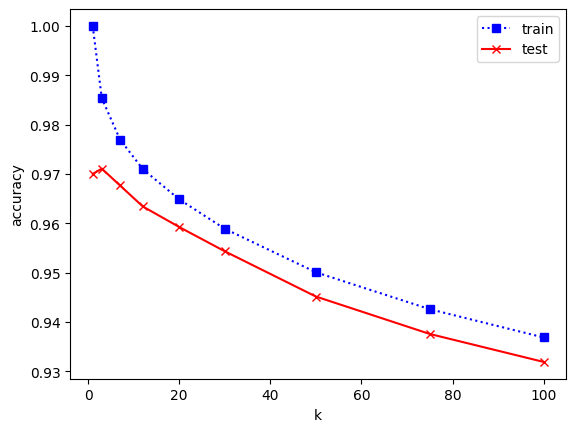

Optimal value of k: 3


In [30]:
#To find the optimal value of k neighbors, experimenting [1, 3, 7, 12, 20, 30, 50, 75, 100].
# plot train acc and test acc with different k
ks = [1, 3, 7, 12, 20, 30, 50, 75, 100]
train_accs = []
val_accs = []
for k in ks:
    knn = KNN(n_neighbors=k)
    knn.fit(X_training, y_training)
    train_accs.append(knn.score(X_training, y_training))
    val_accs.append(knn.score(X_val, y_val))
plt.figure()
plt.plot(ks, train_accs, "bs:", label="train")
plt.plot(ks, val_accs, "rx-", label="test")
plt.legend()
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

optimal_k = ks[val_accs.index(max(val_accs))]
print("Optimal value of k:", optimal_k)

In [31]:
# Combine training and validation sets
X_combined = np.concatenate((X_training, X_val))
y_combined = np.concatenate((y_training, y_val))

# Retrain k-NN classifier with optimal value of k
optimal_knn = KNN(n_neighbors=optimal_k)
optimal_knn.fit(X_combined, y_combined)

# Assess performance on the test set
test_accuracy = optimal_knn.score(X_test, y_test)
print("Test accuracy with optimal k:", test_accuracy)


Test accuracy with optimal k: 0.9705


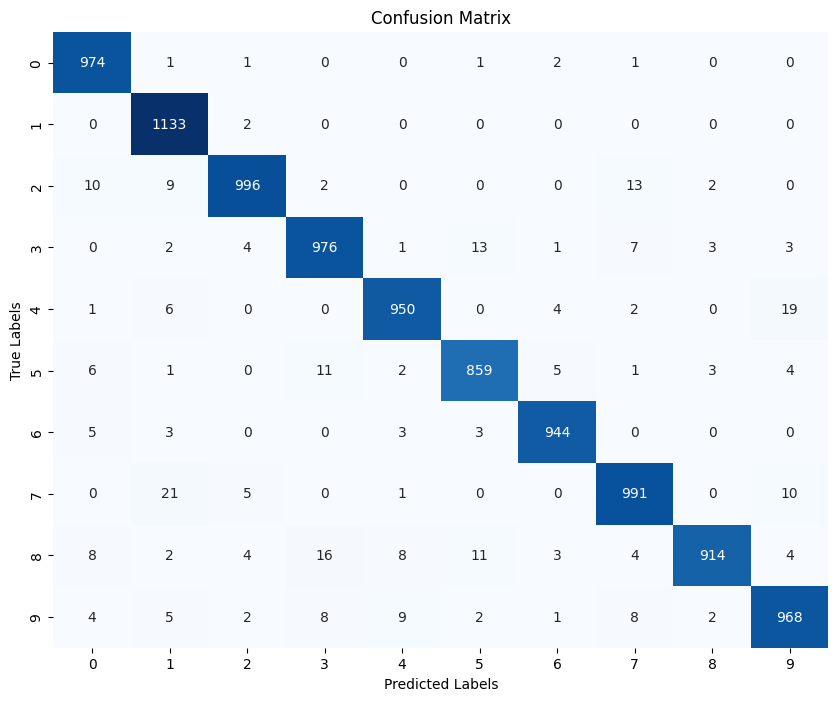

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions on the test set
y_pred = optimal_knn.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [33]:
# how many classes are there in MNIST?
num_classes = len(np.unique(y_test)) # get the count of unique labels

# how many samples from each class are there in the training set?
for i in range(num_classes):
  num_samples_i = (y_test == i).sum()
  print('There are {} samples from class {}'.format(num_samples_i, i))

There are 980 samples from class 0
There are 1135 samples from class 1
There are 1032 samples from class 2
There are 1010 samples from class 3
There are 982 samples from class 4
There are 892 samples from class 5
There are 958 samples from class 6
There are 1028 samples from class 7
There are 974 samples from class 8
There are 1009 samples from class 9


KNN ANALYSIS AND REPORT

Class Imbalance

There is a class imbalance in our dataset.  Some classes, like class 1 (1135 samples) and class 7 (1028 samples), have more samples than others, like class 5 (892 samples) and class 6 (958 samples). This class imbalance can affect the overall performance of the model, especially for the minority classes.

High Misclassification Rates

Class 4: This class has a high misclassification rate as indicated by the low value (914) on the diagonal and high values in the other rows, particularly class 8 (16) and class 3 (13). The model is frequently confusing class 4 with these other classes.
Class 6: Similar to class 4, class 6 also has a low value (859) on the diagonal and a high value (11) in class 2, indicating the model confuses class 6 with class 2 often.
Other Observations

Most classes have a decent number of correctly classified instances on the diagonal, though none are perfect.
There are scattered misclassifications throughout the matrix, but no pairs stand out as overwhelmingly confused with each other besides what was mentioned above for classes 4, 6, 3, and 8.